# CSC360: Homework 1_ Solution


CSC360: Machine Learning and Pattern Recognition
Instructor: Ellie Sherafat (sherafate@easternct.edu)

---

**Due**: Nov 12, 11:59 PM


**How to submit**: Create a zip folder named "Midterm_your name". Include the `.ipynb` file with your answers plus its `.html` file as a backup. 


**Your questions**: 

1- If you have a question for me, post it under the "Questions for the Professor" forum. Any post is visible to your classmates, and they may benefit as well. 

2- Collaboration is allowed but everyone should submit individually


**Important**:
- The places that require your code answer are marked with `"# YOUR CODE"` comments.
- Please do not procrastinate! Reach out to your study group member and start working on the questions as soon as you can.

Good Luck!

---

## Name:Ellie

---

## 1) Balanced Accuracy [20 pts]
Implement a function that calculates balanced accuracy (also called average-per-class-accuracy). Refer to the lecture 15, slides 18-19 for the formula. You can use any library or function, except the functions that directly calculate balanced accuracy.


In [1]:
import numpy as np
from sklearn.metrics import confusion_matrix

def balanced_accuracy(y_true, y_predicted):
    '''
    # Calculate the confusion matrix values
    tp = 0
    tn = 0
    fp = 0
    fn = 0    
    for i in range(len(y_true)):
        if y_true[i] == 1 and y_predicted[i] == 1:
            tp += 1
        elif y_true[i] == 0 and y_predicted[i] == 0:
            tn += 1
        elif y_true[i] == 0 and y_predicted[i] == 1:
            fp += 1
        elif y_true[i] == 1 and y_predicted[i] == 0:
            fn += 1
    '''
    # Get the confusion matrix values from sklearn
    tn, fp, fn, tp = confusion_matrix(y_true, y_predicted).ravel()
    
    return 0.5*(tp/(tp+fn)+tn/(tn+fp))
    # YOUR CODE
    

In [2]:
# RUN THIS CELL, BUT DO NOT MODIFY 

from sklearn.metrics import balanced_accuracy_score

true_labels = np.array(21*[0] + 69*[1])
predicted_labels = np.array(40*[0] + 50*[1])
 
print('Balanced accuracy using sklearn: %.2f%%' % (balanced_accuracy_score(true_labels, predicted_labels)))
print('Balanced accuracy using my function: %.2f%%' % (balanced_accuracy(true_labels, predicted_labels)))


Balanced accuracy using sklearn: 0.86%
Balanced accuracy using my function: 0.86%


## 2) Receiver Operater Characteristic (ROC) [30 pts]
In this section, you need to plot ROC curve and calculate the corresponding AUC. You are given a matrix of probabilities (`y_probabilities`) where a value in the first and second columns refers to probability that a corresponding data point belongs to class 0 and 1, respectively. 

Suppose that the positive label is 1 (`pos_label=1`). Therefore, if `y_probabilities` is 

```
[[0.44001556 0.55998444]
 [0.69026364 0.30973636]
 [0.31814182 0.68185818]
 [0.56957726 0.43042274]
 [0.86339788 0.13660212]
 [0.56957726 0.43042274]
 [0.86339788 0.13660212]
 [0.44001556 0.55998444]
 [0.08899234 0.91100766]
 [0.50487831 0.49512169]
 [0.74306586 0.25693414]
```
 
then, the `y_score` array, which is an input of plot_roc_curve function, is expected to be 

`y_score = [0.5599..., 0.3097..., 0.6818..., 0.4304..., ...]`


---

1- Complete the `"#YOUR CODE"` sections at plot_roc_curve function to plot the ROC curve (refer to lecture 15, sildes 31-32).

2- Explain what AUC is and calculate it using auc function in sklearn. 
**<br>AUC (Area Under Curve): It is a performance metric that shows the area under ROC curve. It ranges in value from 0 to 1. A classifier whose predictions are always wrong has an AUC of 0;one whose predictions are always correct has an AUC of 1; and a random classifier has AUC value about 0.5**

In [3]:
# RUN THIS CELL, BUT DO NOT MODIFY 

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

iris = load_iris()
X = iris.data
y = iris.target
X, y = X[:100, [1]], y[:100]

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.5, shuffle=True, random_state=0, stratify=y)

model = LogisticRegression(solver='lbfgs', random_state=123)
model.fit(X_train, y_train)
; 
y_probabilities = model.predict_proba(X_test)

print(y_probabilities[:10])

[[0.44001556 0.55998444]
 [0.69026364 0.30973636]
 [0.31814182 0.68185818]
 [0.56957726 0.43042274]
 [0.86339788 0.13660212]
 [0.56957726 0.43042274]
 [0.86339788 0.13660212]
 [0.44001556 0.55998444]
 [0.08899234 0.91100766]
 [0.50487831 0.49512169]]


In [4]:
import matplotlib.pyplot as plt
import numpy as np

def plot_roc_curve(y_true, y_score, pos_label=1, num_thresholds=200):

    y_true_arr = np.array(y_true)
    y_score_arr = np.array(y_score)
    x_axis_values = []
    y_axis_values = []
    thresholds = np.linspace(0., 1., num_thresholds)

    num_positives = np.sum(y_true == pos_label)
    num_negatives = y_true.shape[0] - num_positives

    for threshold in thresholds:
        
        # Hint: create a vector which its value is 1, if y_score >= threshold, otherwise its value is 0
        binarized_scores = np.where(y_score >= threshold, pos_label, int(not pos_label))
        # YOUR CODE
        
        positive_predictions = (binarized_scores == pos_label)
        
        true_positives = (y_true[positive_predictions]== pos_label).sum() # YOUR CODE
        false_positives = (y_true[positive_predictions]!= pos_label).sum()# YOUR CODE
        
        x_axis_values.append(false_positives / float(num_negatives))
        y_axis_values.append(true_positives / float(num_positives))

    plt.step(x_axis_values, y_axis_values, where='post')
    
    plt.xlim([0., 1.01])
    plt.ylim([0., 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    
    return None

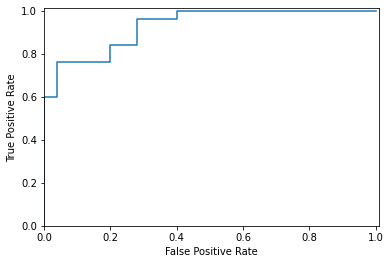

In [5]:
# RUN THIS CELL, BUT DO NOT MODIFY 

plot_roc_curve(y_test, y_probabilities[:, 1], pos_label=1)
plt.show()

In [6]:
# Calculate AUC

# YOUR CODE
from sklearn import metrics

auc = metrics.roc_auc_score(y_test, y_probabilities[:, 1])
print(auc)

0.9047999999999999


In [7]:
from sklearn.metrics import roc_auc_score
# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_probabilities[:, 1])))

# Calculate AUC

AUC: 0.9047999999999999


## 3) Model Evaluation [5*10 pts]

Run the cells in this section and answer the following questions:

---

1- How much will the CV accuracy change if you do not scale the data before modeling? <br>**CV Accuracy w|wo scaling: 0.919+/-0.033 | 0.961+/-0.031 --> The accuracy improved with the scaling**

---

2- What are the difference between the learning curve and the validation curve? <br>**Both curves show the training and validation performance scores (here accuracies) of an estimator (here knn classifier) on the y-axis. 
<br>A learning curve plots the score over varying numbers of training samples, while a validation curve plots the score over a varying hyper parameter. <br>The learning curve is a tool for finding out if an estimator would benefit from more data, or if the model is too simple. The validation curve is a tool for finding good hyper parameter settings.
<br><br> In this section, the learning curve shows that the model would benefit from more data, since the accuracy for both training and validation sets increased. The validation curve shows 5 is the best value for K; in lower values there is the training and validation errors are not close and in larger values the scores start to decrease. Therefore, the value 5 would be the best value for hyperparameter K.**

---

3- Can we diagnose model overfitting/underfitting using the curves? How? 
<br>**Overfitting is when a model makes much better predictions on known data than unknown data (small training error, large testing error). Underfitting is when a model does not make good predictions on both known and unkown data (large training and test errors). <br><br>The model is not overfitted or underfitted since the model has high training and validation scores at the learning curve.**

---

4- How do we treat the overfitting/underfitting? **<br>Overfitting is when a model makes much better predictions on known data than unknown data (small training error, large testing error). A few ways of combatting overfitting are: simplify the model (often done by changing the hyperparameters), select a different model, use more training data, or gather better quality data. <br><br>Underfitting is when a model does not make good predictions on both known and unkown data (large training and test errors). We can combat underfitting with building more complex models. For example, in decision trees we can increase the tree depth or number of features.<br><br> In this section, choosing k=5 helps to avoid overfiting.**

---

5- Change the scoring metric in grid search from `accuracy` to `f1` and report the value. **<br>In most applications, f1 (harmonic mean of precision and recall) is a better metric to judge your model performance.**

With scoring metric 'accuracy': 
<br>0.9694202898550724
<br>{'kneighborsclassifier__n_neighbors': 5}
<br>Test accuracy: 0.965

With scoring metric 'f1': 
<br>0.9564099246736818
<br>{'kneighborsclassifier__n_neighbors': 5}
<br>Test accuracy: 0.965

---

In [8]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                 'machine-learning-databases'
                 '/breast-cancer-wisconsin/wdbc.data', header=None)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
df.shape

(569, 32)

In [10]:
# Transform the class lables from string format to integers 

from sklearn.preprocessing import LabelEncoder

X = df.loc[:, 2:].values
y = df.loc[:, 1].values

le = LabelEncoder()
y = le.fit_transform(y)
print(le.classes_)
print(le.transform(['M', 'B']))

['B' 'M']
[1 0]


In [11]:
# Split the data into 80% training data and 20% test data, using a stratified split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

In [12]:
# Define a pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline


pipe_knn = make_pipeline(StandardScaler(),
                        KNeighborsClassifier(n_neighbors=10))

pipe_knn.fit(X_train, y_train)
y_pred = pipe_knn.predict(X_test)
print('Test Accuracy: %.3f' % pipe_knn.score(X_test, y_test))

Test Accuracy: 0.956


In [13]:
# Using k-fold cross validation to assess model performance

import numpy as np
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=pipe_knn,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy scores: [0.91304348 0.97826087 0.95652174 0.95652174 0.93478261 0.91111111
 0.97777778 0.97777778 1.         1.        ]
CV accuracy: 0.961 +/- 0.031


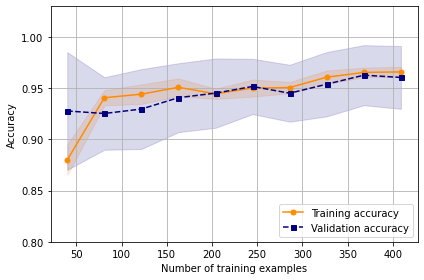

In [14]:
# Learning Curve
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_knn,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='darkorange', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='darkorange')

plt.plot(train_sizes, test_mean,
         color='navy', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='navy')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()

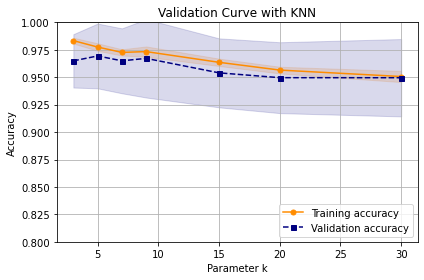

In [15]:
# Validation curve
from sklearn.model_selection import validation_curve


param_range = [3, 5, 7, 9, 15, 20, 30]
train_scores, test_scores = validation_curve(
                estimator=pipe_knn, 
                X=X_train, 
                y=y_train, 
                param_name='kneighborsclassifier__n_neighbors', 
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='darkorange', marker='o', 
         markersize=5, label='Training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='darkorange')

plt.plot(param_range, test_mean, 
         color='navy', linestyle='--', 
         marker='s', markersize=5, 
         label='Validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='navy')

plt.grid()
plt.title("Validation Curve with KNN")
plt.legend(loc='lower right')
plt.xlabel('Parameter k')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.tight_layout()
plt.show()






In [16]:
# Hyperparameter tuning via grid search

from sklearn.model_selection import GridSearchCV

param_range = [3, 5, 7, 9, 15, 20, 30]

pipe_knn = make_pipeline(StandardScaler(),
                         KNeighborsClassifier())

param_grid = [{'kneighborsclassifier__n_neighbors': param_range}]


gs = GridSearchCV(estimator=pipe_knn,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=10,
                  n_jobs=-1)


gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

clf = gs.best_estimator_

print('Test accuracy: %.3f' % clf.score(X_test, y_test))

0.9694202898550724
{'kneighborsclassifier__n_neighbors': 5}
Test accuracy: 0.965
